# **Class 1: Python OOP Review**

## Table of Contents

1. Python-specific concepts
 - Namespace
 - Scope
2. Core OOP concepts
  - Definition of OOP
  - General OOP terminology
3. Important OOP components
  - The concept of "self" in OOP
  - The "init" method (constructor)
4. Variables in OOP
 - Instance variables
 - Class variables
5. Methods in OOP
 - Instance methods
 - Class methods
6. Advanced OOP concepts
 - Class properties
 - Decorators in Python


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/Aulas_Projeto_Capstone/class1/

/content/drive/MyDrive/Aulas_Projeto_Capstone/class1


In [3]:
from IPython.display import Image, display

# **The Game of Thrones Analogy**

In the Seven Kingdoms, different families (functions) live in various castles (namespaces) and control certain regions (scopes). Each castle has its own library of scrolls (variables), and the visibility of these scrolls depends on where the family resides.

**The Local Castle**

At Winterfell, Arya Stark has her own private library. The scrolls in her library (local variables) are only visible to her within the confines of her room (local scope).

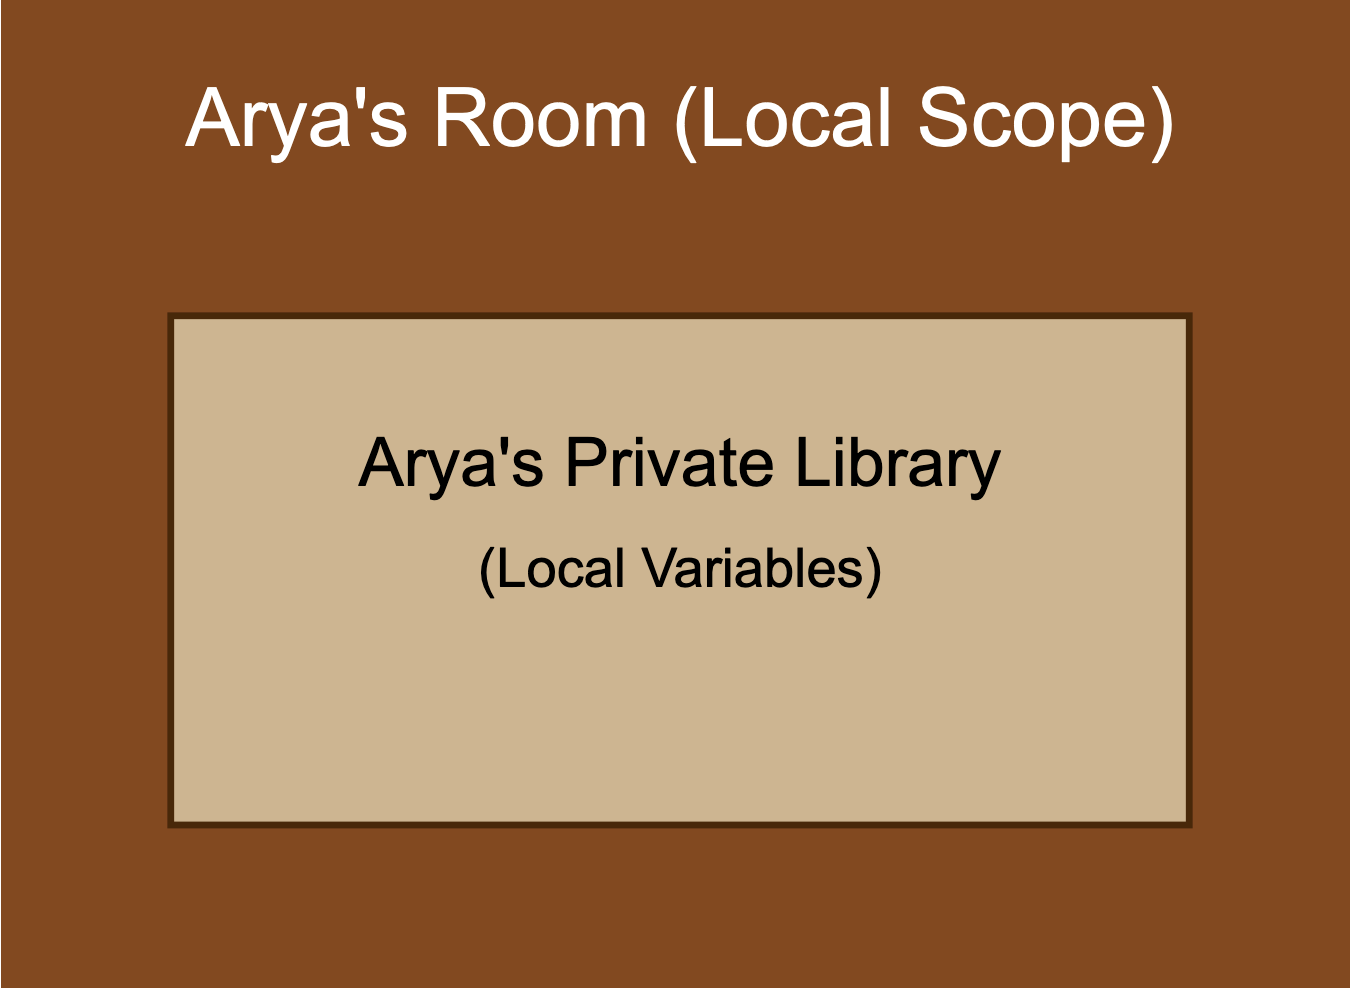

In [ ]:
display(Image(filename='images/arya_room.png', width=300, height=250))

**The Enclosing Castle**

Arya’s brother, Jon Snow, lives in a nearby room in Winterfell (enclosing scope). Jon’s scrolls are in a slightly larger library that also encompasses Arya’s room. If Arya can’t find a scroll in her own library, she can look in Jon's library.

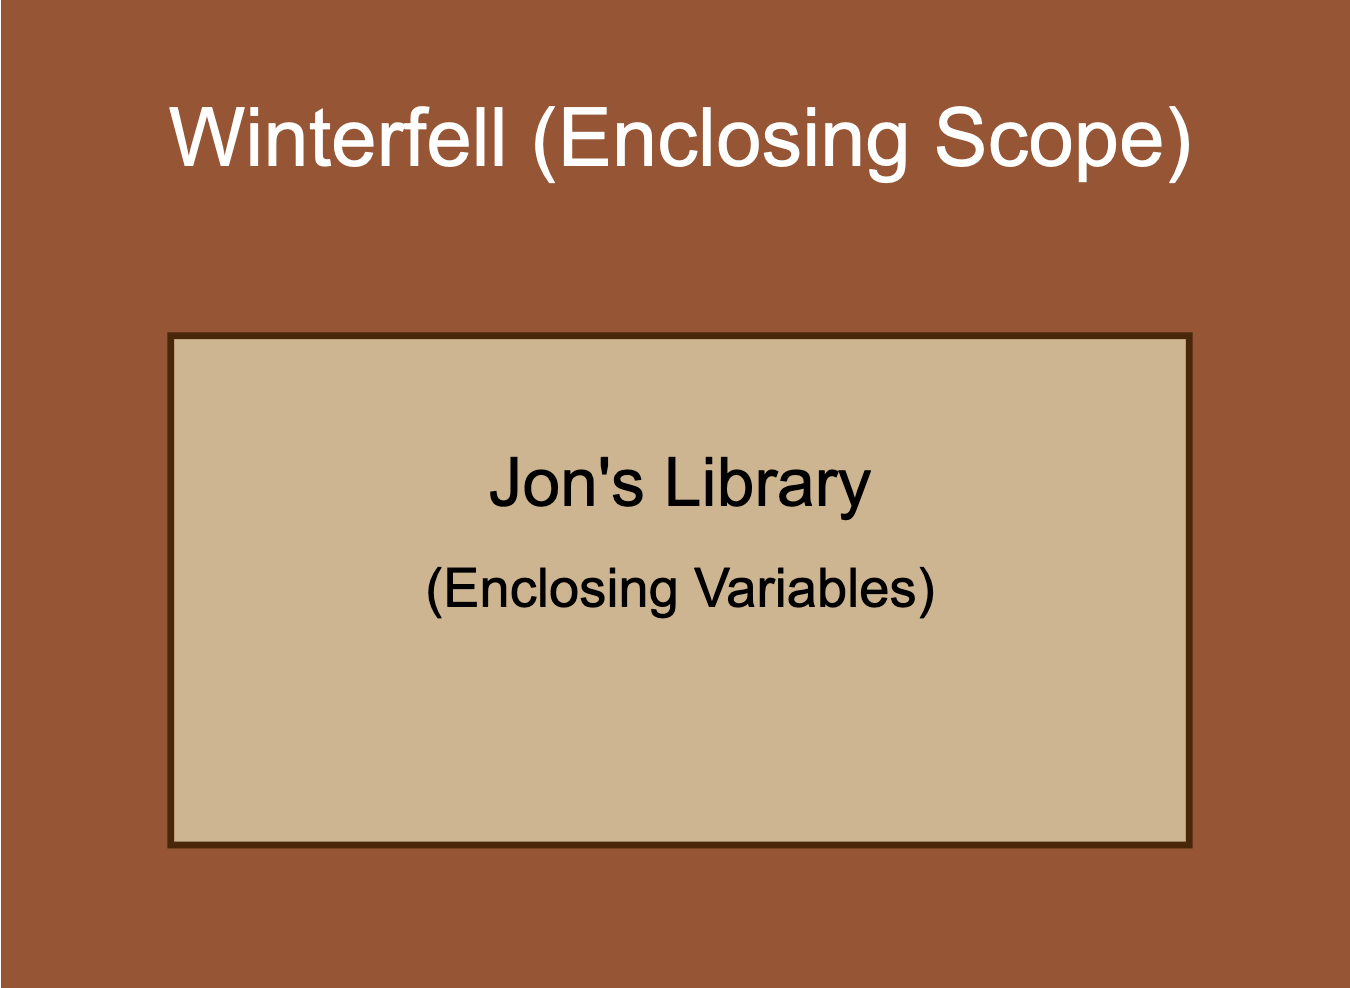

In [ ]:
display(Image(filename='images/jon_room.png', width=300, height=250))

**The Global Castle**

Beyond Winterfell, in King's Landing, Queen Cersei Lannister rules over the entire kingdom. Her library (global namespace) contains scrolls that everyone in the kingdom can potentially access if they can’t find what they need in their own or nearby libraries.

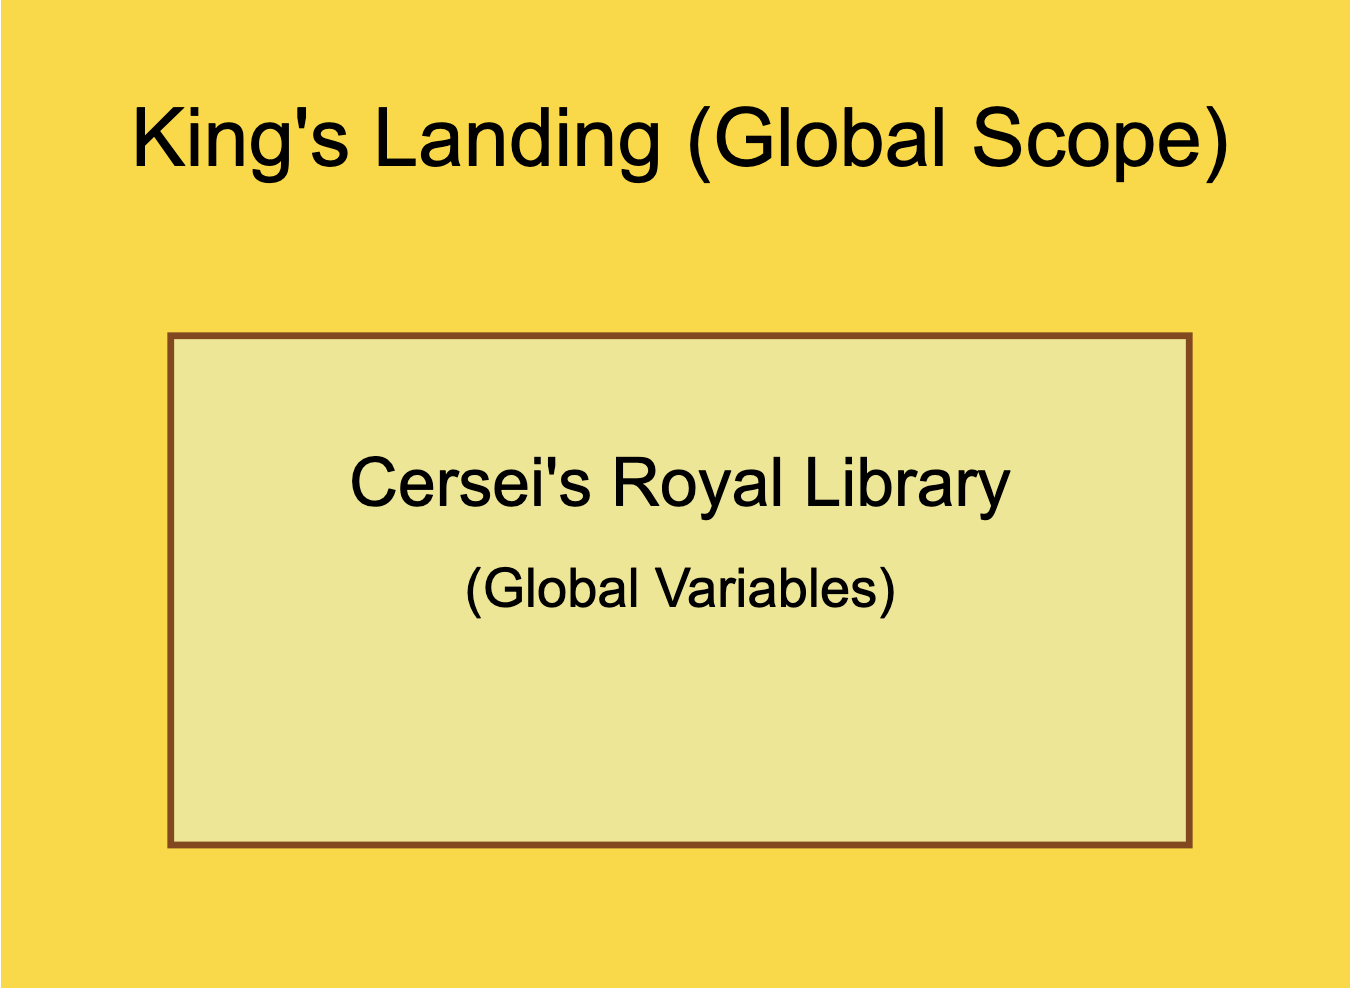

In [ ]:
display(Image(filename='https://github.com/tiagomosantos/CapstoneProject/blob/main/class1/images/arya_room.png', width=300, height=250))

**The Built-in Castle**

Finally, there are ancient texts stored in the Citadel, accessible to all maesters and scholars throughout the Seven Kingdoms. These ancient texts (built-in functions and constants) are universally available.

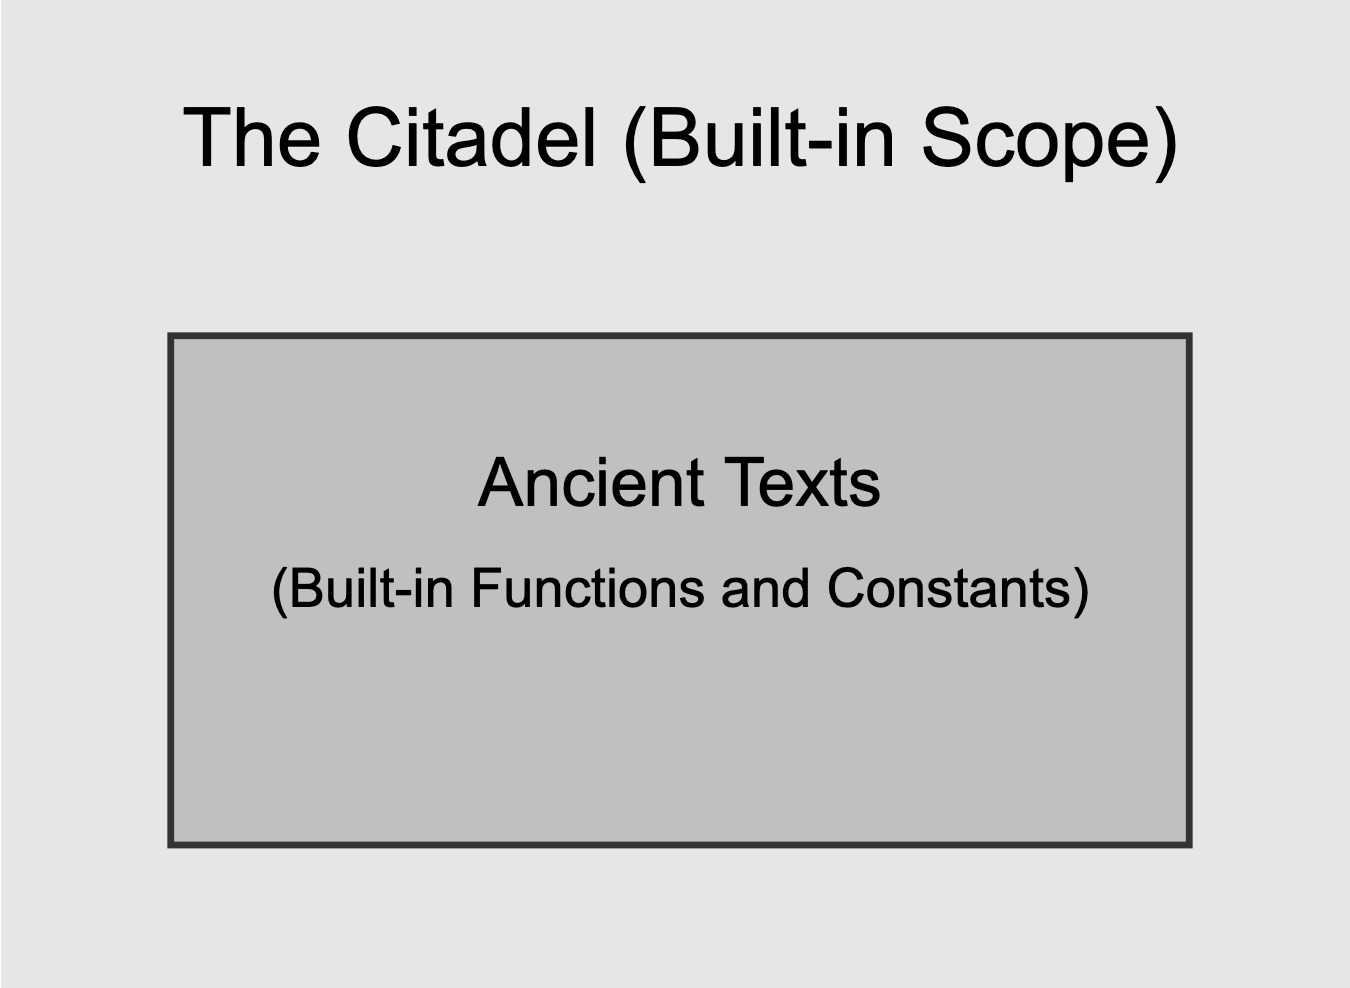

In [ ]:
display(Image(filename='images/citadel.png', width=300, height=250))

**Summary**

In this Game of Thrones analogy:

    Functions: Castles where family members live, defining the scope of visibility for scrolls (variables).
    Variables: Scrolls in the libraries of these castles, representing the data and references within each scope.

Scope Levels:

    Local Scope (Arya's Room): Scrolls are only visible within Arya’s room.
    Enclosing Scope (Jon’s Library): Scrolls are visible within Jon’s larger library, including Arya’s room if Arya doesn’t have her own copy.
    Global Scope (King's Landing): Scrolls are visible to the entire kingdom.
    Built-in Scope (The Citadel): Ancient texts are universally accessible.


# **Namespace**



The namespaces in Python is a container that holds identifiers (names of variables, functions, classes, etc.) and maps them to their corresponding objects. It acts as a boundary, ensuring that names are unique and avoiding naming conflicts. Python provides multiple types of namespaces:



*   Local Namespace: refers to the names defined within a function.
*   Enclosing Namespace: Corresponds to the namespaces of enclosing functions (for nested functions).
*   Global Namespace: Encompasses the names defined at the top level of a module or script.
*   Built-in Namespace: Contains the names of built-in Python functions and objects


Namespaces are Hierarchical:

1. Local
2. Enclosed
3. Global
4. Built-In

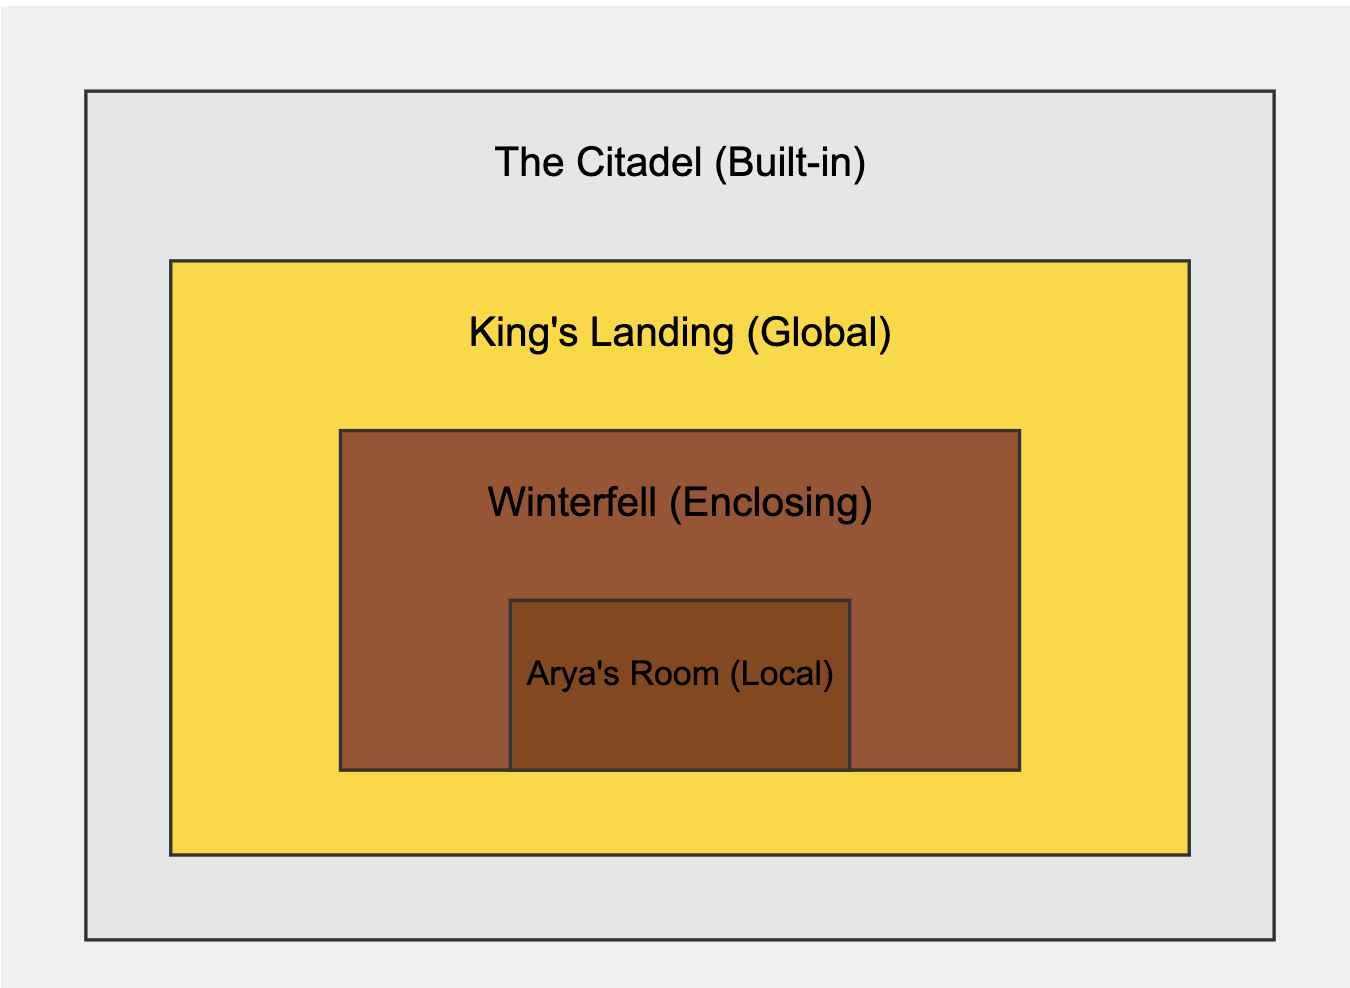

In [ ]:
display(Image(filename='images/overview_of_namespaces.png', width=400, height=350))

The **local namespace** is created whenever a function is called and is destroyed when the function exits. It contains the names of variables and parameters that are defined within the function. These variables are only accessible within the function’s body. When the function is called again, a new local namespace is created.

In [4]:
def winterfell():
    needle = "Arya's sword"  # Local scope (Arya's private scroll)
    print(needle)  # Arya finds her sword in her private library

winterfell()
print(needle)
# Trying to access local_var outside the function
# This will raise a NameError
# print(local_var)

Arya's sword


NameError: name 'needle' is not defined

**Enclosing namespaces** come into play when you have nested functions, where one function is defined inside another. The inner function can access variables from the outer function’s namespace.

In [7]:
def winterfell():
    longclaw = "Jon's sword"  # Enclosing scope (Jon's scroll)

    def arya_room():
        needle = "Arya's sword"  # Local scope (Arya's private scroll)
        print(needle)  # Arya finds her sword in her private library
        print(longclaw)  # Jon finds his sword in his larger library

    arya_room()


In [8]:
winterfell()

Arya's sword
Jon's sword


**Global Namespace:** The global namespace covers the entire module or script. Variables defined at the top level of the module belong to the global namespace and are accessible from anywhere within the module.

In [9]:
iron_throne = "Cersei's throne"  # Global scope (Cersei's scroll)

def winterfell():
    longclaw = "Jon's sword"  # Enclosing scope (Jon's scroll)

    def arya_room():
        needle = "Arya's sword"  # Local scope (Arya's private scroll)
        print(needle)  # Arya finds her sword in her private library

    arya_room()
    print(longclaw)  # Jon finds his sword in his larger library

print(iron_throne)  # Everyone in the kingdom recognizes Cersei's throne

Cersei's throne


**Built-in Namespace:** The built-in namespace contains Python’s built-in functions and objects. These names are always available without the need for importing or defining them. Examples include functions like print() and objects like int and lists.

In [ ]:
def citadel():
    def winterfell():
        def arya_room():
            needle = "Arya's sword"  # Local scope (Arya's private scroll)
            print(needle)  # Arya finds her sword in her private library

        arya_room()
        print(len("needle"))  # Jon uses the ancient text "len" from the Citadel

    winterfell()
    print(len("longclaw"))  # Cersei uses the ancient text "len" from the Citadel

print(len("iron throne"))  # The ancient text "len" is always available to everyone


# **What is Scope in Python?**

Scope defines the region in a program where a namespace is accessible. It determines which names can be referenced from a given location in code. Python employs the LEGB (Local, Enclosing, Global, Built-in) rule to resolve names in different namespaces. This rule signifies that if a name is not found in the local namespace, the interpreter will search for it in the enclosing, global, and built-in namespaces in that order.

Relationship Between Scope and Namespace


*   Scope Determines Visibility: The scope of a name determines which namespace Python will look in to find that name. For example, if you reference a variable inside a function, Python first looks in the local namespace of that function.
*   Namespaces are Hierarchical: Namespaces are nested according to the scope hierarchy. The local namespace is searched first, followed by the enclosing namespace, then the global namespace, and finally the built-in namespace.
*   Lifetime of Namespaces: The lifetime of a namespace depends on its scope. Local namespaces are created when a function is called and destroyed when the function returns. Global namespaces last for the duration of the program execution. Built-in namespaces are always available.
    
    
    

# What is OOP?

Object-Oriented Programming (OOP) is a programming paradigm that organizes code around the concepts of "objects." Objects are instances of classes, which are blueprints or templates defining the properties (attributes) and behaviors (methods) that objects of that type will have.

Classes in Python are like blueprints for creating objects. In the world of Game of Thrones, we can think of classes as characters of Westeros. Each character has its own characteristics.

## Our first class Character

In [ ]:
class Character:
    def __init__(self, name, house):
        self.name = name
        self.house = house

The Character class can now store some information, and it can do something. But this code has not actually created a character yet. Here is how you actually make a character:

In [ ]:
jon_snow = Character("Jon Snow", "Stark")
print(f"{jon_snow.name} of House {jon_snow.house}")

Jon Snow of House Stark


Classes are a way of combining information and behavior. For example, let's consider what you'd need to do if you were creating a character in a board game. One of the first things you'd want to track are the x and y coordinates of the character.

In [ ]:
class Character:
    def __init__(self, name, house):
        self.name = name
        self.house = house
        self.health = 100
        self.position = (0, 0)

The Character class only stores pieces of information so far, but it can't do anything. The first behavior to define is a core behavior of a character: moving.

In [ ]:
class Character:
    def __init__(self, name, house):
        self.name = name
        self.house = house
        self.health = 100
        self.position = (0, 0)

    def move(self, direction):
        x, y = self.position
        if direction == 'north':
            self.position = (x, y + 1)
        elif direction == 'south':
            self.position = (x, y - 1)
        elif direction == 'east':
            self.position = (x + 1, y)
        elif direction == 'west':
            self.position = (x - 1, y)

In [ ]:
tyrion = Character("Tyrion", "Lannister")
print(f"{tyrion.name}'s position: {tyrion.position}")

Tyrion's position: (0, 0)


In [ ]:
tyrion.move('north')
print(f"{tyrion.name}'s position: {tyrion.position}")

Tyrion's position: (0, 1)


To actually use a class, you create a variable such as *tyrion*. Then you set that equal to the name of the class, with an empty set of parentheses. Python creates an **object** from the class. An object is a single instance of the Character class; it has a copy of each of the class's variables, and it can do any action that is defined for the class. In this case, you can see that the variable tyrion is a Character object from the \_\_main\_\_ program file, which is stored at a particular location in memory.


In [ ]:
print(tyrion)

To access an object's variables or methods, you give the name of the object and then use *dot notation* to access the variables and methods. So to get the x and y values of *tyrion*, you use *tyrion.position*. To use the move() method on tyrion, you write *tyrion.move("north")*.

**Exercise 1: Enhancing the Character Class**

1. **Add an attribute for attack strength:**
    - Modify the `__init__` method to include `strength`, `intelligence`, `intelligence` attributes.

2. **Create an `speak_words` method:**
    - Define a method called `speak_words` that takes zero arguments.
    - Print a message indicating the name of the character and the house hords.
3. **Implement a `total_stats` method:**
    - Define a method called `total_stats` that takes zero arguments.
    - The method should return the total sum of all character stats.

<a name='general_terminology'></a>General terminology
---
*   Class: A blueprint for creating objects (e.g., the Character class)
*   Object: An instance of a class (e.g., Tyrion)
*   Attribute: A property of an object (e.g., the character intelligence, strength, or position)
*   Method: A function that belongs to a class (e.g., move)


## Is it possible to modify a class atrribute using an object?

The `__dict__` attribute of a module is essentially a dictionary that stores all the names defined within that module along with their values (the actual objects).

Python uses **mappingproxy** to implement the `__dict__` attribute of classes. This attribute gives you access to a class's/module namespace, but it's a mappingproxy to ensure that the class's attributes cannot be modified directly.

In [ ]:
class Character():
    name = 'Tyrion'

tyrion = Character()
tyrion.__dict__

{}

`__dict__` represents an object's namespace, containing its writable attributes.

You can acess the class attribute using the object or using the class.

In [ ]:
tyrion.name

'Tyrion'

In [ ]:
tyrion.name

'Tyrion'

Let's try to modify a class attribute from an object.

In [ ]:
tyrion.name = 'Lannister'

In [ ]:
tyrion.name

'Lannister'

In [ ]:
tyrion.__dict__

{'name': 'Lannister'}

But if you check the original class attribute it is unchanged.

In [ ]:
Character.name

'Tyrion'

You cannot modify class attributes directly through objects, because of how Python lookup for attributes.

The  attribute lookup from an instance/object has the following hiearrchy:

1.   Checks the object namespaces.
2.   Checks the class namespaces.

## What is the self in OOP?

In [ ]:
class Arya():
    def speak_words():
        name = 'Arya'
        words = 'Winter is Coming'
        return f"{name} says: {words}"

In [ ]:
 Arya.speak_words()

'Arya says: Winter is Coming'

We can access class attributes using an instance, methods are also attributes of a class.

In [ ]:
arya1 = Arya()
arya1.speak_words()

TypeError: Arya.speak_words() takes 0 positional arguments but 1 was given

It says the function takes 0 positional arguments which is True, but i also says that 1 argument was given. Why? **Python does that automatically.**

When we create an object/instance of a class, the variable object in our case *arrya1* is a pointer to a **Arya** object that is stored in memory.

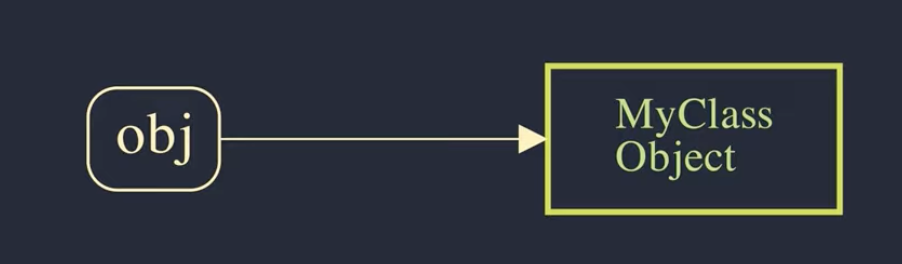

In [ ]:
display(Image(filename='images/obj_pointer.png', width=300, height=100))

Like all functions *speak_words* function also has it's own scope. And since our instance *arya1* was created outside the body of the function it doesn't has acess to it.

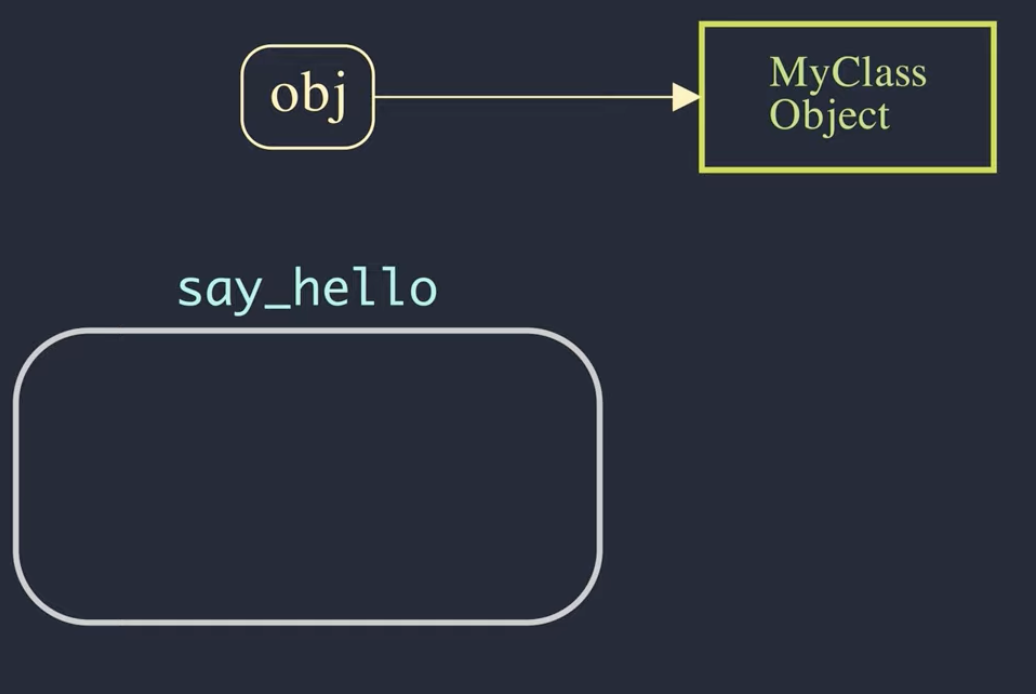

In [ ]:
display(Image(filename='images/unbounded_function.png', width=400, height=300))

When we use an instance to call a function that is defined as a class attribute Python automatically passes to the instance as the first attribute of the function. And we need to specify a parameter in our function to catch this behaviour. To catch this we use **'self'**

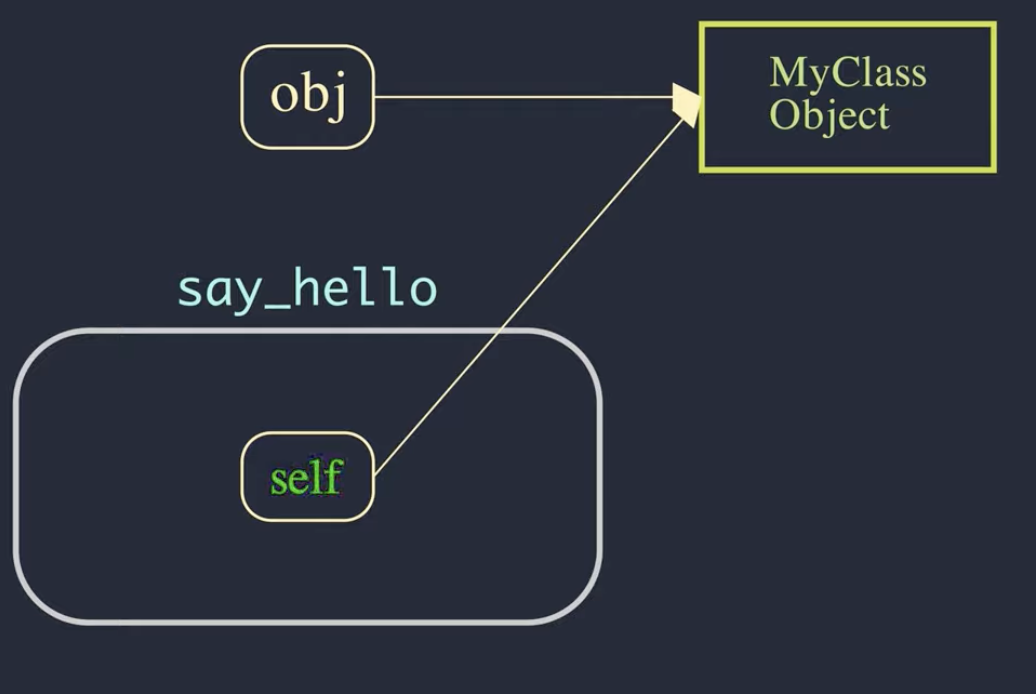

In [ ]:
display(Image(filename='images/what_is_self.png', width=400, height=300))

Methods with self are called instance methods.

In [ ]:
class Arya():
    def speak_words(self):
        name = 'Arya'
        words = 'Winter is Coming'
        return f"{name} says: {words}"

In [ ]:
arya1 = Arya()
arya1.speak_words()

'Arya says: Winter is Coming'

In [ ]:
print(Arya.speak_words)

<function Arya.speak_words at 0x7f7f89a569e0>


In [ ]:
print(arya1.speak_words)

<bound method Arya.speak_words of <__main__.Arya object at 0x7f7f89a2a6e0>>


## What is the \_\_init__ in OOP?

Function names that start and end with two underscores are special built-in functions that Python uses in certain ways. The __init()__ method is one of these special functions. It is called automatically when you create an object from your class. The __init()__ method lets you make sure that all relevant attributes are set to their proper values when an object is created from the class, before the object is used.

In [ ]:
class Character:
    def __init__(self, name, house):
        self.name = name
        self.house = house

It is important to make clear that init doesn't create the instance/object. It only populates the instance attributes when we create one, that's why we also use self as the first argument of \_\_init__.

<a name="und_self"></a>Instance and Class Variables
---


### Instance Variables

**Instance variables** are variables that are unique to each instance (object) of the class. They are defined **within methods of the class** and used to store data specific to individual objects. It is possible for objects of the same class to have their own independent data through instance variables.



- **Instance Level:** The primary scope of instance variables is within the instance itself. They can be accessed and modified by any method belonging to that instance.

In [ ]:
class Character():
    def __init__(self, name, words):
        self.name = name
        self.words = words

    def speak_words(self):
        return f"{self.name} says: {self.words}"

In [ ]:
# Using the method
arya = Character("Arya", "Winter is Coming")
arya.speak_words()

'Arya says: Winter is Coming'

In [ ]:
arya.name = "Tyrion"

In [ ]:
arya.speak_words()

'Tyrion says: Winter is Coming'

- **Class Level:** You cannot access instance variables directly through the class itself because they are specific to individual instances.

In [ ]:
print(Character.name)

AttributeError: type object 'Character' has no attribute 'name'

Why Use Instance Variables?


*   **Unique State**: Instance variables store the unique state or characteristics of each instance (e.g., name, age, color of a dog).
*   **Flexibility**: Each instance can have different values for its instance variables, making the class more flexible and reusable.

### Class Variables

**Class variables** are variables that are **shared among all instances** (objects) of a class. Unlike instance variables, which have a separate copy for each object, class variables are associated with the class itself, and any modification to the class variable **affects all instances of the class**. **Class variables** are **accessible** from both **class methods and instance methods**.


**Class Level**:  You can access and modify class variables directly through the class itself:

In [ ]:
class Character():
    name = 'Arya'
    words = 'Winter is Coming'

    def speak_words(self):
        return f"{name} says: {words}"

In [ ]:
print(Character.name)

Arya


In [ ]:
Character.name = 'Tyrion'
print(Character.name)

Tyrion


**Instance Level**: You can also access class variables through instances of the class. However, this can be tricky:


*   Python Lookup: When you access a class variable through an instance (my_car.num_wheels), Python first checks if the instance has its own attribute with that name. If not, it looks for the class variable.
*   Creating Instance Attributes: If you assign a value to a class variable using an instance (my_car.num_wheels = 3), you're actually creating a new instance attribute that shadows the class variable. Subsequent changes through the instance will only affect the instance attribute, not the class variable.

In [ ]:
class Character():
    name = 'Arya'
    words = 'Winter is Coming'

    def speak_words(self):
        return f"{name} says: {words}"

In [ ]:
arya = Character()
print(arya.name)

Arya


In [ ]:
Character.name = 'Tyrion'
print(arya.name)

Tyrion


In [ ]:
Character.name

'Tyrion'

Why Use Class Variables?

- **Shared State**: Class variables are useful for storing data that's common to all instances of a class (e.g., default settings, counters).
    Constants: They can be used to define constants that are relevant to the class.

<a name="und_self"></a>Instance and Class Methods
---


### Instance Methods

Methods with self are called instance methods.

In [ ]:
class Arya():
    def speak_words(self):
        name = 'Arya'
        words = 'Winter is Coming'
        return f"{name} says: {words}"

In [ ]:
arya = Arya()
arya.speak_words()

'Arya says: Winter is Coming'

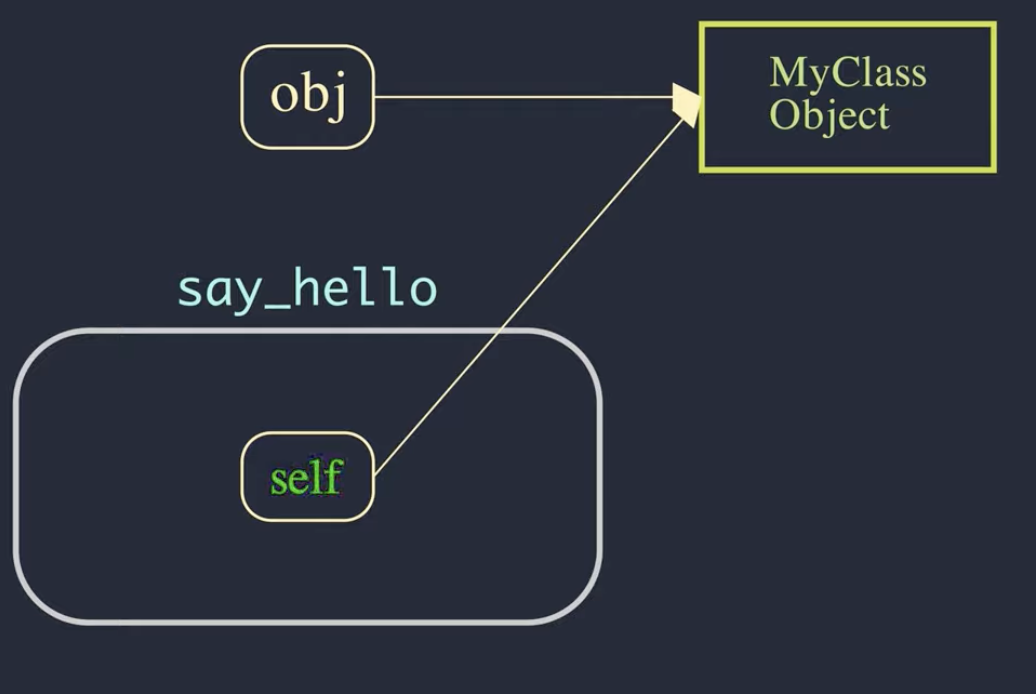

In [ ]:
display(Image(filename='images/what_is_self.png', width=300, height=200))

In [ ]:
print(arya.speak_words)

<bound method Arya.speak_words of <__main__.Arya object at 0x7f7f880dff70>>


### Class Methods

The instance attributes can mask class attributes.

In Python, the `@classmethod` decorator is used to define a special type of method called a class method. Unlike regular instance methods that operate on an instance of the class (self), class methods are bound to the class itself (cls) and receive the class as their implicit first argument.


In [ ]:
class Character:
    total_characters = 0  # Class variable to track the total number of characters

    def __init__(self, name, house):
        self.name = name
        self.house = house
        Character.total_characters += 1  # Increment the count when a new character is created

    @classmethod
    def get_total_characters(cls):
        return cls.total_characters  # Access the class variable through 'cls'

In [ ]:
jon = Character("Jon Snow", "Stark")

In [ ]:
print(f"Total characters created: {Character.get_total_characters()}")

Total characters created: 1


In [ ]:
daenerys = Character("Daenerys Targaryen", "Targaryen")

In [ ]:
print(Character.get_total_characters())

2


Why class methods?

1.   Accessing and Modifying Class State
  *   They provide a way to work with class variables (shared among all instances).
  *   You can use class methods to read, update, or perform calculations based on class-level data.

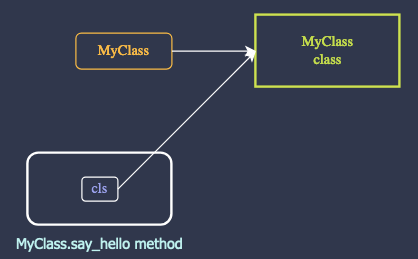

In [ ]:
display(Image(filename='images/what_is_cls.png', width=300, height=200))

In [ ]:
print(daenerys.get_total_characters)

<bound method Character.get_total_characters of <class '__main__.Character'>>


In [ ]:
print(Character.get_total_characters)

<bound method Character.get_total_characters of <class '__main__.Character'>>


How It Works

When you decorate a method with `@classmethod`, Python automatically passes the class (cls) as the first argument when the method is called.  This allows the method to access class attributes and class state directly.


The  attribute lookup from an instance/object (for a `@classmethod`) has the following hiearrchy:

1.   Checks the class namespaces.
2.   Checks the object namespaces.

## Back to Our Class

In [ ]:
class Character:
    def __init__(self, name, house, strength, intelligence, charisma):
        self.name = name
        self.house = house
        self._strength = strength
        self._intelligence = intelligence
        self._charisma = charisma
        self._health = 100
        self.position = (0, 0)

    def move(self, direction):
        x, y = self.position
        if direction == 'north':
            self.position = (x, y + 1)
        elif direction == 'south':
            self.position = (x, y - 1)
        elif direction == 'east':
            self.position = (x + 1, y)
        elif direction == 'west':
            self.position = (x - 1, y)

    def speak_words(self):
        return f"{self.name} says: {self.words}"

    def total_stats(self):
        return self._strength + self._intelligence + self._charisma

**Exercise 2: Managing Character Healt**

1. **Add a `get_health` method:**
    - Define a method called `get_health` that takes no arguments.
    - The method should return the current health of the character.

2. **Create a `change_health` method:**
    - Define a method called `change_health` that takes one argument, `value`.
    - The method should increase or decrease the character's health by the given `value`.
    - Ensure that the health does not go below 0 or above 100.
    - Otherwise set the current health to `value`.

In [ ]:
class Character:
    def __init__(self, name, house, strength, intelligence, charisma):
        self.name = name
        self.house = house
        self._strength = strength
        self._intelligence = intelligence
        self._charisma = charisma
        self._health = 100
        self.position = (0, 0)

    def move(self, direction):
        x, y = self.position
        if direction == 'north':
            self.position = (x, y + 1)
        elif direction == 'south':
            self.position = (x, y - 1)
        elif direction == 'east':
            self.position = (x + 1, y)
        elif direction == 'west':
            self.position = (x - 1, y)

    def total_stats(self):
        return self._strength + self._intelligence + self._charisma

    def get_health(self):
        return self._health

    def change_health(self, value):
        if value < 0:
            self._health = 0
        elif value > 100:
            self._health = 100
        else:
            self._health = value


Notice the subtile change in some class attributes, for example `health` became `_healt`.
The underscore makes it a private variable.

From the user perspective he still can use `health`.

In [ ]:
john = Character("John Snow", "Stark", 10, 10, 10)

In [ ]:
john.health = -1

In [ ]:
john.health

-1

We don't want the user to be able to change the health without any validation. And we don't want to call the function `change_health`everytime we want to change the `health`.

In [ ]:
class Character:
    def __init__(self, name, house, strength, intelligence, charisma):
        self.name = name
        self.house = house
        self._strength = strength
        self._intelligence = intelligence
        self._charisma = charisma
        self._health = 100
        self.position = (0, 0)

    def get_health(self):
        return self._health

    def change_health(self, value):
        if value < 0:
            self._health = 0
        elif value > 100:
            self._health = 100
        else:
            self._health = value

    health = property(fget=get_health, fset=change_health)

In [ ]:
john = Character("John Snow", "Stark", 10, 10, 10)

In [ ]:
john.health = -1

In [ ]:
john.health = 100

In [ ]:
john.health

100

## Class Property

All methods in the property class has None as default value and all arguments shoud be functions.

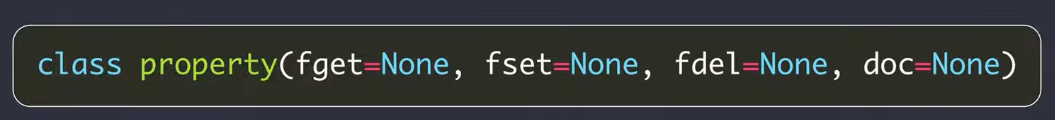

In [ ]:
display(Image(filename='images/class_property.png', width=600, height=100))

In [ ]:
class Character:
    def __init__(self, name, house, strength, intelligence, charisma):
        self.name = name
        self.house = house
        self._strength = strength
        self._intelligence = intelligence
        self._charisma = charisma
        self._health = 100
        self.position = (0, 0)

    def get_health(self):
        return self._health

    def change_health(self, value):
        if value < 0:
            self._health = 0
        elif value > 100:
            self._health = 100
        else:
            self._health = value

    def delete_health(self):
        del self._health

    health = property(fget=get_health, fset=change_health, fdel=delete_health)

In [ ]:
john = Character("John Snow", "Stark", 10, 10, 10)

In [ ]:
del john.health

In [ ]:
john.health

AttributeError: 'Character' object has no attribute '_health'

The property class always return a property object.

In [ ]:
p1 = property()
print(p1)

 This allows you to create a chain of property methods.

In [ ]:
def get_strength(self):
        return self._strength

In [ ]:
p1 = property()

In [ ]:
p2 = p1.getter(get_strength)

In [ ]:
p2.fget, p2.fset, p2.fdel

(<function __main__.get_strength(self)>, None, None)

In [ ]:
def set_strength(self,value):
    self._strength = value

In [ ]:
p3 = p2.setter(set_strength)

In [ ]:
p3.fget, p3.fset, p3.fdel

(<function __main__.get_strength(self)>,
 <function __main__.set_strength(self, value)>,
 None)

With this in mind we can rewrite our function using `decorator` syntax.
A `decorator` is a function that takes another function as an argument and returns a new function.

## What are Decorators?

Decorators are a design pattern in Python that allows you to add functionality to an existing function or method. They are typically used to wrap another function in order to extend its behavior without permanently modifying it.
Decorators are prefixed with the `@` symbol followed by the decorator function name and placed on the line immediately before the function or method they are decorating.

### `@classmethod` Decorator


This decorator is used to define a class method. A class method receives the class as the first argument, typically named cls. It can modify class state that applies across all instances of the class.

### `@property` Decorator

The property decorator allows you to define a method that acts like a getter for an attribute.

*   Getter: The @property decorator is used to define a method that gets the value of an attribute. When you access the property, the getter method is called.

*   Setter: The @<property_name>.setter decorator is used to define a method that sets the value of an attribute. When you assign a value to the property, the setter method is called.

*   Deleter: The @<property_name>.deleter decorator is used to define a method that deletes an attribute. When you delete the property, the deleter method is called.
    

    

**You must use the same name for the getter, setter, and deleter methods to ensure they are associated with the same property.**

In [ ]:
class Character:
    def __init__(self, name, house, strength, intelligence, charisma):
        self.name = name
        self.house = house
        self._strength = strength
        self._intelligence = intelligence
        self._charisma = charisma
        self._health = 100
        self.position = (0, 0)


    @property
    def health(self):
        return self._health

    @health.setter
    def health(self, value):
        if value < 0:
            self._health = 0
        elif value > 100:
            self._health = 100
        else:
            self._health = value

    @health.deleter
    def health(self):
        del self._health

In [ ]:
john = Character("John Snow", "Stark", 10, 10, 10)

In [ ]:
john.health

100

In [ ]:
john.health = 5

In [ ]:
john.health

5

## Back to Our Class (Again)

In [ ]:
class Character:
    def __init__(self, name, house, strength, intelligence, charisma):
        self.name = name
        self.house = house
        self._strength = strength
        self._intelligence = intelligence
        self._charisma = charisma
        self._health = 100
        self.position = (0, 0)

    def move(self, direction):
        x, y = self.position
        if direction == 'north':
            self.position = (x, y + 1)
        elif direction == 'south':
            self.position = (x, y - 1)
        elif direction == 'east':
            self.position = (x + 1, y)
        elif direction == 'west':
            self.position = (x - 1, y)

    @property
    def speak_words(self):
        return f"{self.name} says: {self.words}"

    @property
    def total_stats(self):
        return self._strength + self._intelligence + self._charisma

    @property
    def health(self):
        return self._health

    @health.setter
    def health(self, value):
        if value < 0:
            self._health = 0
        elif value > 100:
            self._health = 100
        else:
            self._health = value

    @health.deleter
    def health(self):
        del self._health

**Exercise 3: Add an inventory system**

1. **Implement an `Inventory` class and integrate it with the `Character` class:**
    - `Inventory` should have methods to add, remove items and get the total_value
    - Add a property to `Character` that returns the total value of items in the inventory.
    - Implement a method in `Character` to use an item from the inventory.

In [ ]:
class Inventory:
    def __init__(self, capacity=10):
        self.items = []
        self.capacity = capacity

    def add_item(self, item):
        if len(self.items) < self.capacity:
            self.items.append(item)
            return True
        return False

    def remove_item(self, item):
        if item in self.items:
            self.items.remove(item)
            return True
        return False

    def get_total_value(self):
        return sum(item.value for item in self.items)


In [ ]:
class Character:
    def __init__(self, name, house, strength, intelligence, charisma):
        self.name = name
        self.house = house
        self._strength = strength
        self._intelligence = intelligence
        self._charisma = charisma
        self._health = 100
        self.position = (0, 0)
        self.inventory = Inventory()

    def move(self, direction):
        x, y = self.position
        if direction == 'north':
            self.position = (x, y + 1)
        elif direction == 'south':
            self.position = (x, y - 1)
        elif direction == 'east':
            self.position = (x + 1, y)
        elif direction == 'west':
            self.position = (x - 1, y)


    @property
    def total_stats(self):
        return self._strength + self._intelligence + self._charisma

    @property
    def health(self):
        return self._health

    @health.setter
    def health(self, value):
        if value < 0:
            self._health = 0
        elif value > 100:
            self._health = 100
        else:
            self._health = value

    @health.deleter
    def health(self):
        del self._health

    @property
    def inventory_value(self):
      return sum(self.inventory.items.values())

    def use_item(self, item_name):
        for item in self.inventory.items:
            if item.name == item_name:
                item.use(self)
                self.inventory.remove_item(item)
                return True
        return False


**Exercise 4: Implement a combat system**

1. **Create a `combat()` function that simulates combat between two characters:**
    - Add an attribute defense to `Character` class.
    - Calculate damage based on the attacker's strength and the defender's defense.
    - Update health values accordingly.
    - Return a string describing the outcome of the combat

In [ ]:
class Character:
    def __init__(self, name, house, strength, intelligence, charisma, defense):
        self.name = name
        self.house = house
        self.strength = strength
        self._intelligence = intelligence
        self._charisma = charisma
        self._health = 100
        self.position = (0, 0)
        self.inventory = Inventory()
        self.defense = defense

    def move(self, direction):
        x, y = self.position
        if direction == 'north':
            self.position = (x, y + 1)
        elif direction == 'south':
            self.position = (x, y - 1)
        elif direction == 'east':
            self.position = (x + 1, y)
        elif direction == 'west':
            self.position = (x - 1, y)

    @property
    def total_stats(self):
        return self.strength + self._intelligence + self._charisma

    @property
    def health(self):
        return self._health

    @health.setter
    def health(self, value):
        if value < 0:
            self._health = 0
        elif value > 100:
            self._health = 100
        else:
            self._health = value

    @health.deleter
    def health(self):
        del self._health

    @property
    def inventory_value(self):
      return sum(self.inventory.items.values())

    def use_item(self, item_name):
      if item_name in self.inventory.items:
        print(f"{self.name} used {item_name}")
        self.inventory.remove_item(item_name)
      else:
        print(f"{self.name} does not have {item_name}")


In [ ]:
def combat(attacker, defender):
    damage = max(0, attacker.strength - defender.defense)
    defender.health -= damage
    if defender.health <= 0:
        return f"{attacker.name} has defeated {defender.name}!"
    else:
        return f"{attacker.name} attacked {defender.name} for {damage} damage. {defender.name} has {defender.health} health remaining."

In [ ]:
attacker = Character("Jon Snow", "Stark", 15, 12, 10, 5)
defender = Character("Ramsay Bolton", "Bolton", 13, 15, 8, 7)
combat(attacker, defender)

'Jon Snow attacked Ramsay Bolton for 8 damage. Ramsay Bolton has 92 health remaining.'

**Exercise 5: Implement a Game Board and Character Placement System**

1. **Implement the create_board(size) function:**
    - Create and return a 2D list representing the game board.
    - The board should be size x size and filled with empty spaces (' ').

2. **Implement the print_board(board) function:**
    - Display the game board in a readable format.
    - Each cell should be separated by '|' and each row should be on a new line.

3. **Implement the place_characters(board, characters) function:**
    - Randomly (use import random) place each character from the characters list on an empty space on the board.
    - Update each character's position attribute with its new position (x, y).
    - Ensure characters don't overlap on the board.

4. **Complete the main() function:**
    - Create a game board of size 5x5 using create_board().
    - Place the pre-defined characters (Jon, Daenerys, Tyrion) on the board using place_characters().
    - Print the board using print_board().
    - Print each character's name and position.

In [ ]:
import random

def create_board(size):
    return [[' ' for _ in range(size)] for _ in range(size)]

def print_board(board):
    for row in board:
        print('|' + '|'.join(row) + '|')
    print()

def place_characters(board, characters):
    size = len(board)
    for character in characters:
        while True:
            x, y = random.randint(0, size-1), random.randint(0, size-1)
            if board[y][x] == ' ':
                board[y][x] = str(character)
                character.position = (x, y)
                break

def main():
    # Define characters
    jon = Character("Jon", "Stark", 80, 70, 75, 75)
    daenerys = Character("Daenerys", "Targaryen", 70, 85, 90, 65)
    tyrion = Character("Tyrion", "Lannister", 50, 95, 85, 55)

    characters = [jon, daenerys, tyrion]

    # Create and populate the board
    board_size = 5
    game_board = create_board(board_size)
    place_characters(game_board, characters)

    # Print the board
    print_board(game_board)

    # Print character positions
    for character in characters:
        print(f"{character.name} is at position {character.position}")
